<a href="https://colab.research.google.com/github/Ashwin5412/Customer-Support-Ticket-Cleaning-Annotation-System/blob/main/Customer_Support_Ticket_Cleaning_%26_Annotation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Customer Support Ticket Cleaning & Annotation System**


**Import Libraries**

In [32]:
import pandas as pd
import re
import nltk
import spacy
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
from wordcloud import WordCloud

**Download Required Resources**

In [33]:
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")

nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Load Dataset**

In [36]:
df = pd.read_csv(r"/content/tickets_500.csv")

print("\nDataset Loaded Successfully!")
df.head()


Dataset Loaded Successfully!


,ticket_id,message,expected_category
0,1,How to update my profile,General Query
1,2,Website not loading,Technical Issue
2,3,Login failed multiple times,Login Issue
3,4,Package not delivered yet,Delivery Issue
4,5,Have a question regarding services,General Query


**Text Cleaning**

In [37]:
def clean_text(text):

    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()

    return text


df["clean_text"] = df["message"].apply(clean_text)
print("Text Cleaning Completed!")

Text Cleaning Completed!


**Tokenization & Stopword Removal**

In [38]:
stop_words = set(stopwords.words("english"))

def tokenize_text(text):

    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    return tokens


df["tokens"] = df["clean_text"].apply(tokenize_text)
print("Tokenization Completed!")

Tokenization Completed!


**Lemmatization**

In [39]:
def lemmatize_text(text):

    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    return " ".join(lemmas)


df["lemmatized_text"] = df["clean_text"].apply(lemmatize_text)
print("Lemmatization Completed!")

Lemmatization Completed!


**Named Entity Recognition (NER)**

In [40]:
def extract_entities(text):

    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities


df["entities"] = df["message"].apply(extract_entities)
print("NER Extraction Completed!")

NER Extraction Completed!


**Sentiment Analysis**

In [41]:
def get_sentiment(text):

    blob = TextBlob(text)
    return blob.sentiment.polarity

df["sentiment_score"] = df["message"].apply(get_sentiment)
print("Sentiment Analysis Completed!")

Sentiment Analysis Completed!


**Auto Labeling**

In [42]:
def label_ticket(text):

    if "login" in text or "account" in text:
        return "Login Issue"

    elif "payment" in text or "bill" in text or "refund" in text:
        return "Payment Issue"

    elif "order" in text or "delivery" in text or "delay" in text:
        return "Delivery Issue"

    elif "error" in text or "crash" in text or "bug" in text:
        return "Technical Issue"

    else:
        return "General Query"

df["category"] = df["clean_text"].apply(label_ticket)
print("Auto Labeling Completed!")

Auto Labeling Completed!


**Save Processed Dataset**

In [43]:
output_file = "processed_tickets.csv"
df.to_csv(output_file, index=False)
print("\nProcessed Dataset Saved:", output_file)


Processed Dataset Saved: processed_tickets.csv


**Data Visualization**


Generating Graphs...


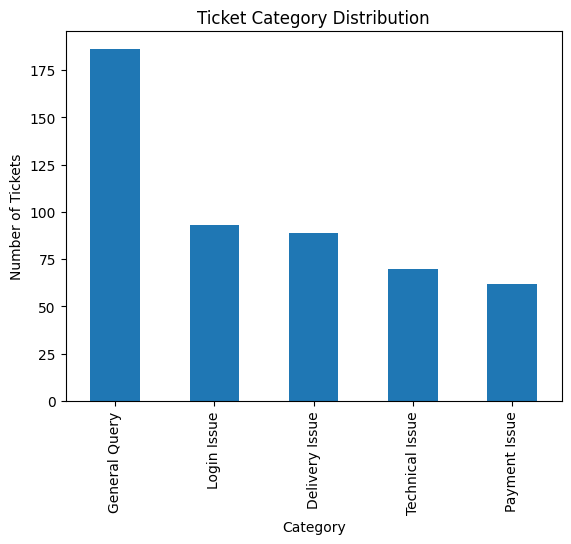

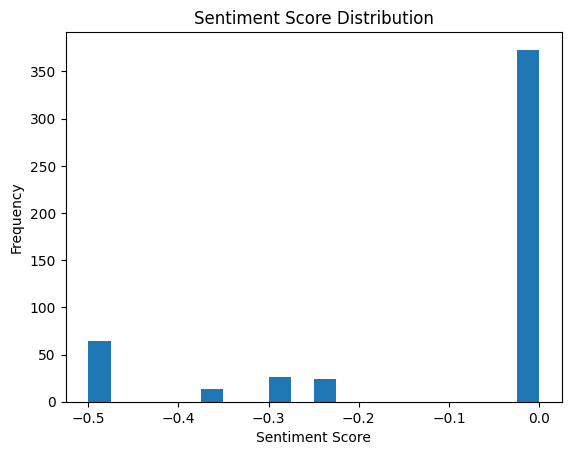

In [44]:
print("\nGenerating Graphs...")
plt.figure()
df["category"].value_counts().plot(kind="bar")
plt.title("Ticket Category Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Tickets")
plt.show()


plt.figure()
plt.hist(df["sentiment_score"], bins=20)
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

**Most Common Words**

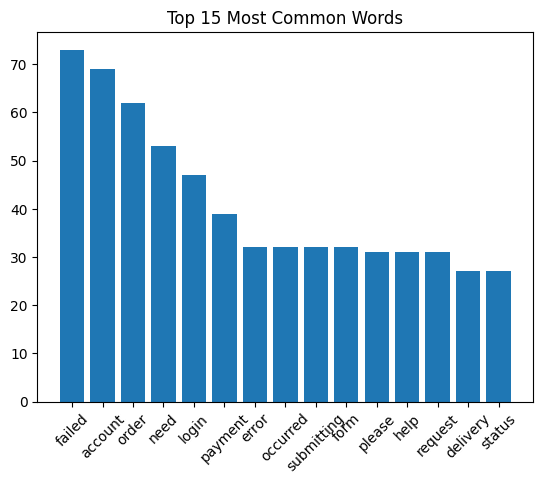

In [45]:
all_words = []

for tokens in df["tokens"]:
    all_words.extend(tokens)

word_freq = Counter(all_words)
common_words = dict(word_freq.most_common(15))


plt.figure()
plt.bar(common_words.keys(), common_words.values())
plt.title("Top 15 Most Common Words")
plt.xticks(rotation=45)
plt.show()

**Show Sample Output**

In [46]:
print("\nSample Processed Records:\n")

print(df[[
    "message",
    "clean_text",
    "tokens",
    "entities",
    "sentiment_score",
    "category"
]].head())


Sample Processed Records:

                              message                          clean_text  \
0            How to update my profile            how to update my profile   
1                 Website not loading                 website not loading   
2         Login failed multiple times         login failed multiple times   
3           Package not delivered yet           package not delivered yet   
4  Have a question regarding services  have a question regarding services   

                             tokens entities  sentiment_score       category  
0                 [update, profile]       []             0.00  General Query  
1                [website, loading]       []             0.00  General Query  
2  [login, failed, multiple, times]       []            -0.25    Login Issue  
3         [package, delivered, yet]       []             0.00  General Query  
4   [question, regarding, services]       []             0.00  General Query  
